In [1]:
import pandas as pd
import pickle

from xgb_model_functions import SplitModel
from preproc_functions import pre_process

In [2]:
# python3 harness.py --input_csv  <input file in csv> --output_csv <output csv file path to which the predictions are written> 

 The output should be a csv with a single column with PD estimates corresponding to the testing input rows. Your output should not have a header

In [3]:
historical_data = pd.read_csv('historical_features.csv',index_col=0)

In [4]:
historical_data['stmt_date'] = pd.to_datetime(historical_data['stmt_date'])

In [5]:
with open('custom_bins.pkl', 'rb') as inp:
    custom_bins = pickle.load(inp)

with open('preproc_params.pkl', 'rb') as inp:
    preproc_params = pickle.load(inp)

with open('trained_model.pkl', 'rb') as inp:
    trained_model = pickle.load(inp)

In [6]:
holdout_df = pd.read_csv('test_for_2012.csv',index_col=0)

holdout_df['stmt_date'] = pd.to_datetime(holdout_df['stmt_date'])
holdout_df['def_date'] = pd.to_datetime(holdout_df['def_date'], format="%d/%m/%Y")
holdout_df.sort_values('stmt_date', inplace=True)

In [7]:
test_data_proc , preproc_params = pre_process(holdout_df, 
                                             historical_df=historical_data, 
                                             new=False, 
                                             preproc_params = preproc_params,  
                                             quantiles = 50, 
                                             days_until_statement = 150)

asst_tot_quantile
financial_leverage_quantile
profitability_ratio_quantile
roe_quantile


/Users/juanroalvarado/nyu/finance/ml-finance-credit-default/final_harness/preproc_functions.py:173: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[growth_feature_name].fillna(0, inplace=True)


net_income_growth_quantile
quick_ratio_v2_quantile


/Users/juanroalvarado/nyu/finance/ml-finance-credit-default/final_harness/preproc_functions.py:173: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[growth_feature_name].fillna(0, inplace=True)


sales_growth_quantile
cash_assets_ratio_quantile
dscr_quantile
using training pds for ateco_sector
using training pds for sector_group
using training pds for regional_code
cfo_quantile
using training pds for legal_struct


In [8]:
# test_data_proc

In [9]:
predictions = trained_model.predict(test_data_proc)

rec data length 172921
first data length 12718


In [11]:
test_results = test_data_proc[['default']].copy()
test_results['predictions'] = predictions

In [13]:
from sklearn import metrics

ROC AUC 0.8666052142535062


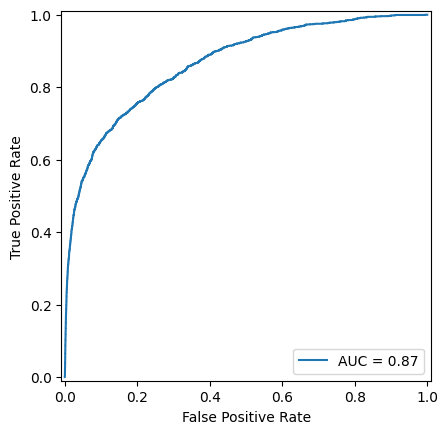

In [14]:
fpr, tpr, thresholds = metrics.roc_curve(test_results['default'], test_results['predictions'])
roc_auc = metrics.auc(fpr, tpr)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
print(f'ROC AUC {roc_auc}')
roc_display.plot()

In [13]:
output_path = 'results.csv'
predictions.to_csv(output_path,index=False,header=False)

In [18]:
res = pd.read_csv('results.csv',header=None)

In [23]:

test_results = test_data_proc[['default']].copy()
test_results['predictions'] = res.values

In [24]:
test_results

,default,predictions
Unnamed: 0,,
21,0,0.113111
2757816,0,0.107541
2757825,0,0.012752
2757832,0,0.000917
2757853,0,0.004252
...,...,...
1122512,0,0.003149
1122564,0,0.003648
1122600,0,0.018034


ROC AUC 0.8666052142535062


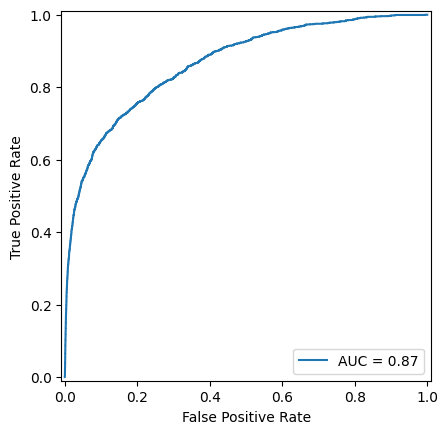

In [25]:
fpr, tpr, thresholds = metrics.roc_curve(test_results['default'], test_results['predictions'])
roc_auc = metrics.auc(fpr, tpr)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
print(f'ROC AUC {roc_auc}')
roc_display.plot()